In [7]:
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [8]:
scenario = str(2089)
path_to_results = r"C:\toolbox-amiris-emlab\emlabpy\plots\Scenarios\NL-fix_profiles_demand"

path_to_results = os.path.join(path_to_results, scenario + ".xlsx" )

path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "AMIRIS_Results", scenario )
if not os.path.exists(path_to_plots):
    os.makedirs(path_to_plots)
    
elec_prices_data =  pd.read_excel(path_to_results, sheet_name='energy_exchange', index_col=0)    


In [9]:
marginal_price = {
    0: "PV",
    48.58: "Industrial heat",
    33.00: "Electrolyzer",
    2.70: "Offshore",
    1.35: "Onshore",
    9.93: "Nuclear",
    4000: "VOLL",
    1500: "HighLS",
    500: "MedLS",
    250: "LowLS",
    114.25: "H2 turbine"
}
fuel_colors = {
    'Industrial heat': "black",
    'H2 turbine': "darkred",
    "PV": "gold",
    'Nuclear': "mediumorchid",
    'Offshore': "navy",
    'Onshore': "blue",
    'notfound': "purple",
    'Electrolyzer': "gray",
    "LowLS": "lemonchiffon",
    'HighLS': "darkorange",
    'MedLS': "orange",
    "VOLL": "lime",
    "Wind and Solar": "green",
    "Nuclear and H2 turbines" : "darkred", 
    "Static Load": "purple"
}

In [12]:
elec_prices_data.head()

,AgentId,TimeStep,TotalAwardedPowerInMW,ElectricityPriceInEURperMWH,DispatchSystemCostInEUR
0,1,946080003,31483.767686,33.0,119621.695914
1,1,946083603,31779.915896,33.0,120436.296069
2,1,946087203,34882.998920,33.0,127874.954126
3,1,946090803,37797.387725,33.0,134750.044352
4,1,946094403,39607.289864,33.0,139015.718485


In [14]:
elec_prices_data.sort_values(by="ElectricityPriceInEURperMWH")


,AgentId,TimeStep,TotalAwardedPowerInMW,ElectricityPriceInEURperMWH,DispatchSystemCostInEUR
6058,1,967888803,71783.254646,2.7,4.891998e+04
2892,1,956491203,71840.493826,2.7,5.919251e+04
2893,1,956494803,71814.538887,2.7,6.492170e+04
6273,1,968662803,69800.908836,2.7,8.579137e+04
6274,1,968666403,70068.896698,2.7,7.316763e+04
...,...,...,...,...,...
8058,1,975088803,24382.190550,1500.0,1.555494e+06
8059,1,975092403,24519.365655,1500.0,1.555725e+06
7577,1,973357203,19112.302593,4000.0,1.542097e+06
7578,1,973360803,19840.146881,4000.0,1.543686e+06


In [ ]:
merit_order_no_res["CumulatedPower"] = merit_order_no_res["Power"].cumsum()
merit_order_no_res["Fuel"] = merit_order_no_res["Trader"].apply(
    lambda x: traders_fuel.get(x)
)
merit_order_no_res

In [11]:
path_folder_out = "./outputs/"
merit_order = pd.read_csv( "./supply_book.csv", sep=";", header=None)
# Add Headers and remove last technical element
merit_order.columns = ["Power", "Price", "Trader"]
merit_order = merit_order.iloc[:-1]
merit_order
res_traders = [11, 12, 13]
merit_order_no_res = merit_order.loc[~merit_order["Trader"].isin(res_traders)]

In [10]:
merit_order_no_res["CumulatedPower"] = merit_order_no_res["Power"].cumsum()
traders_fuel = {
    1000: "NUCLEAR",
    1001: "LIGNITE",
    1002: "HARD_COAL",
    1003: "NATURAL_GAS_CC",
    1004: "NATURAL_GAS_GT",
    1005: "OIL"
}
merit_order_no_res["Fuel"] = merit_order_no_res["Trader"].apply(
    lambda x: traders_fuel.get(x)
)
merit_order_no_res


C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_7164\4194139756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merit_order_no_res["CumulatedPower"] = merit_order_no_res["Power"].cumsum()
C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_7164\4194139756.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merit_order_no_res["Fuel"] = merit_order_no_res["Trader"].apply(


,Power,Price,Trader,CumulatedPower,Fuel
3,48.02,-106.805310,1001,48.020,LIGNITE
4,490.00,-102.230984,1001,538.020,LIGNITE
5,490.00,-97.651988,1001,1028.020,LIGNITE
6,490.00,-93.068196,1001,1518.020,LIGNITE
7,490.00,-88.479483,1001,2008.020,LIGNITE
...,...,...,...,...,...
334,93.00,231.279731,1005,74272.692,OIL
335,93.00,234.090885,1005,74365.692,OIL
336,93.00,236.918382,1005,74458.692,OIL
337,93.00,239.762605,1005,74551.692,OIL


In [4]:
colors = {
    'PV': '#fcb001',
    'WindOff': '#0504aa',
    'WindOn': '#82cafc',
    'Biogas': '#15b01a',
    'RunOfRiver': '#c79fef', 
    'NUCLEAR': '#e50000',
    'LIGNITE': '#7f2b0a',
    'HARD_COAL': '#000000', 
    'NATURAL_GAS_CC': '#a57e52',
    'NATURAL_GAS_GT': '#929591', 
    'OIL': '#aaa662'
}
matrix = merit_order_no_res[['Fuel', 'Price', 'CumulatedPower']].values
MeritOrder = np.zeros((0,3))
matrix

KeyError: "['Fuel', 'CumulatedPower'] not in index"

In [5]:
for el in range(len(matrix)-1):
    MeritOrder = np.append(MeritOrder, np.reshape(matrix[el,], (1,3)), axis=0)
    if matrix[el,0] != matrix[el+1,0]:
        obj = np.reshape(matrix[el,], (1,3))
        obj[0][0] = matrix[el+1,0]
        MeritOrder = np.append(MeritOrder, obj, axis=0)

MeritOrder = pd.DataFrame(
    data=MeritOrder, 
    columns=['Fuel', 'Price', 'CumulatedPower']
)
MeritOrder = MeritOrder.astype({'CumulatedPower': 'float32', 'Price': 'float32'})
MeritOrder

NameError: name 'matrix' is not defined

C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_7164\2834978657.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merit_order_no_res["CumulatedPower"] = merit_order_no_res["Power"].cumsum()
C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_7164\2834978657.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merit_order_no_res["Fuel"] = merit_order_no_res["Trader"].apply(


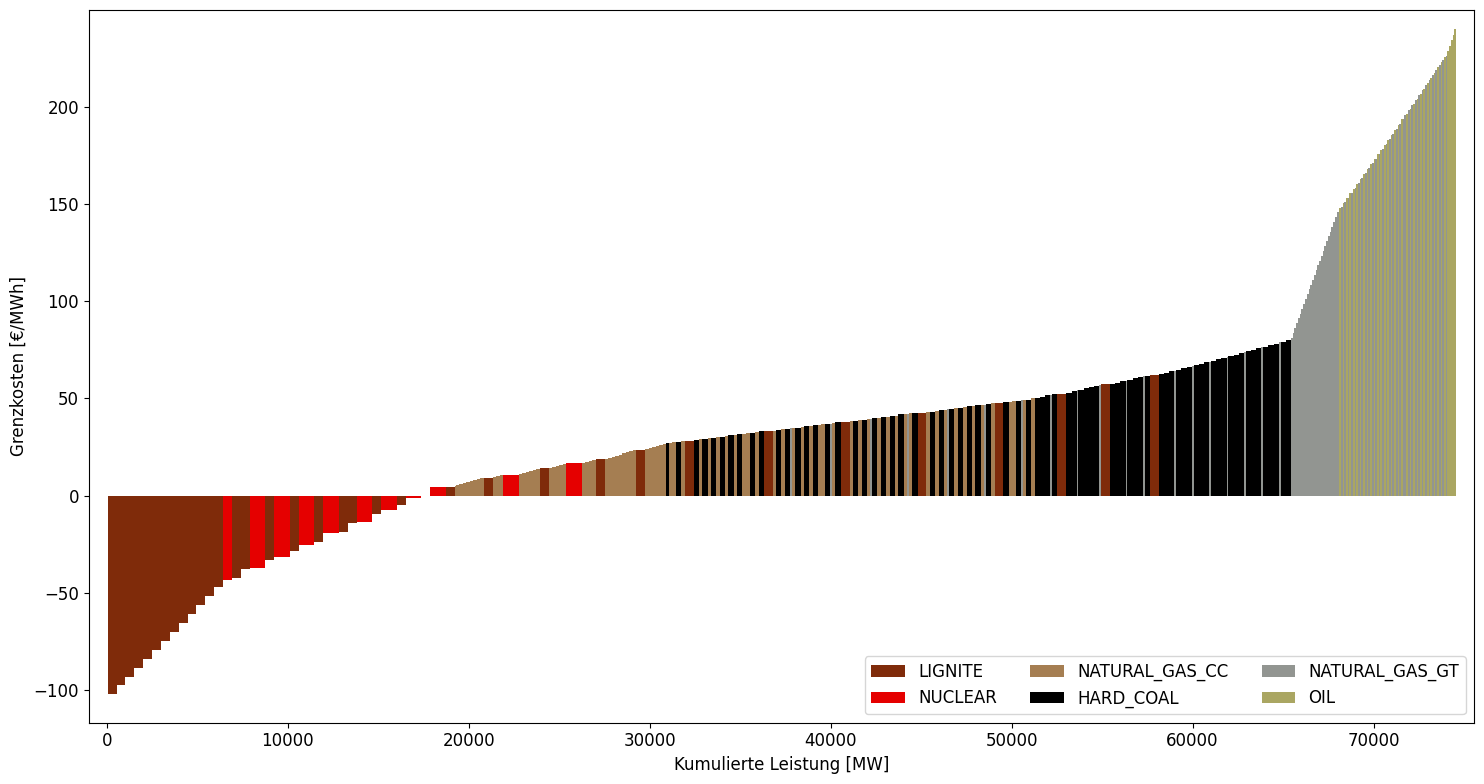

In [4]:

plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(figsize = (15,8))

for fuel in MeritOrder['Fuel'].unique():
    _ = ax.fill_between(x='CumulatedPower',
                        y1='Price',
                        where = MeritOrder["Fuel"] == fuel,
                        facecolor = colors[fuel],
                        step = "pre",
                        lw = 15,
                        #        interpolate = True,
                        data = MeritOrder,
                        label=fuel)

_ = ax.set(
    xlim=(-1000, MeritOrder['CumulatedPower'].max() + 1000),
    ylim=(MeritOrder['Price'].min() - 10, MeritOrder['Price'].max() + 10)
           #lim=(-200, 300)
)
_ = plt.xlabel('Kumulierte Leistung [MW]')
_ = plt.ylabel('Grenzkosten [€/MWh]')
_ = ax.legend(loc='lower right', ncol=3)

plt.tight_layout()

plt.savefig("merit_order_plot.png")

plt.show()